## Introduction

**Offer Recommender example:**  
___
In this example we will show how to:
- Setup the required environment for accessing the ecosystem prediction server.
- View and track business performance of the Offer Recommender.

## Setup

**Setting up import path:**  
___
Add path of ecosystem notebook wrappers. It needs to point to the ecosystem notebook wrapper to allow access to the packages required for running the prediction server via python.
- **notebook_path:** Path to notebook repository. 

In [ ]:
notebook_path = "/path of to ecosystem notebook repository"

In [ ]:
# ---- Uneditible ----
import sys
sys.path.append(notebook_path)
# ---- Uneditible ----

**Import required packages:**  
___
Import and load all packages required for the following usecase.

In [2]:
# ---- Uneditible ----
import pymongo
from bson.son import SON
import pprint
import pandas as pd
import json
import numpy
import operator
import datetime
import time
import os
import matplotlib.pyplot as plt

from prediction import jwt_access
from prediction import notebook_functions
from prediction.apis import functions
from prediction.apis import data_munging_engine
from prediction.apis import data_management_engine
from prediction.apis import worker_h2o
from prediction.apis import prediction_engine
from prediction.apis import worker_file_service

%matplotlib inline
# ---- Uneditible ----

**Setup prediction server access:**  
___
Create access token for prediction server.
- **url:** Url for the prediction server to access.
- **username:** Username for prediction server.
- **password:** Password for prediction server.

In [3]:
url = "http://demo.ecosystem.ai:3001/api"
username = "user@ecosystem.ai"
password = "cd486be3-9955-4364-8ccc-a9ab3ffbc168"

In [4]:
# ---- Uneditible ----
auth = jwt_access.Authenticate(url, username, password)
# ---- Uneditible ----

Login Successful.


## Enrich Data

In [5]:
database = "master"
collection = "bank_transactions"
field = "{}"
limit = 100
projections = "{}"
skip = 0

In [7]:
output = data_management_engine.get_data(auth, database, collection, field, limit, projections, skip) 
df = pd.DataFrame(output)
df.head()

get /getMongoDBFind?database=master&collection=bank_transactions&field={}&limit=100&projections={}&skip=0&


**Enrich Data Set:**  
___


**Talk about why this enrichments are usefull**

In [6]:
attribute = "MCC"
find = "{}"
data_munging_engine.enrich_mcc(auth, database, collection, attribute, find)

get /mccEnrich?mongodb=master&collection=bank_transactions&attribute=MCC&find={}&


{'message': 'Processing, check thread log for status: ["1ab14140-1eb7-4df3-8794-00badf298ca8","b01660cc-ed75-4775-bda6-afe12b96383b","bf54d347-cace-46f2-8e97-453bb0426929","1a4a56f7-c1c8-4d2e-a585-c0074276524d","d8c4dac2-1799-407b-a23b-e98b8649f5df","7644a5ef-4cf2-445b-a772-3fcc01c760f9","48139d1c-4b81-4d1e-9892-12b048c0d755"]'}

In [8]:
attribute = "eff_date=ddMMMyyyy"
find = "{}"
data_munging_engine.enrich_date2(auth, database, collection, attribute, find)

get /2/dateEnrich?mongodb=master&collection=bank_transactions&attribute=eff_date=ddMMMyyyy&find={}&


{'message': 'Processing, check thread log for status: ["58525a21-7630-4cc5-a351-739a5b8eb96f","ec51bb4d-7d59-4472-acfd-3a7c42c015b7","8c424a99-6a58-492a-a814-fc5f3cc620ed","e7c31e80-9077-465e-8ab2-e8b6bd3ee7d7","0d4a9d65-7112-4006-a3ea-b9c2fa9d3147","785af1a2-cd10-46e9-967a-ac8bb2d02866","e0e98a4c-41ea-40b5-8b75-6a4bd4d4e711"]'}

In [45]:
pd.set_option('display.max_columns', None)
field = '{}'
output = data_management_engine.get_data(auth, database, collection, field, limit, projections, skip) 
df = pd.DataFrame(output)
df.head()

get /getMongoDBFind?database=master&collection=bank_transactions&field={}&limit=100&projections={}&skip=0&


,mcc_base_category,account_type,eff_date,trait_description,eff_date_day_of_year,trns_amt_category,eff_date_day_of_week,trns_amt,trns_amt_base_category,eff_date_year_month,effYearMonth,trns_type,eff_date_year,mcc_category,eff_date_day_of_week_no,eff_date_week_and_day,eff_date_day,mcc_spend_type,mcc_category_tree,trns_amt_spend_type,eff_date_public_holiday,trns_amt_category_tree,eff_date_day_weekend,trns_amt_sub_category,personality_description,intl_ind,eff_date_epoch,MCC,eff_date_month,trns_amt_description,mcc_description,eff_date_week_of_month,effReformatted,eff_date_date,_id,eff_date_week_of_year,mcc_sub_category,customer
0,Food and Dining,CHEQUE,02JUL2018,NA,183,NA,Mon,120.87,NA,2018-07,JUL2018,CardPurchases,2018,Food,2,1-2,02,Essential,Food and Dining - Food - Grocery Stores,NA,not,NA - NA - NA,0,NA,NA,0,{'$numberLong': '1530489600000'},5411,7,NA,Grocery Stores Supermarkets,1,2018-07-02,2018-07-02,{'$oid': '6045d81503cff11a1aba068a'},27,Grocery Stores,590
1,Food and Dining,CHEQUE,11JUL2018,NA,192,NA,Wed,275.75,NA,2018-07,JUL2018,CardPurchases,2018,Food,4,2-4,11,Essential,Food and Dining - Food - Grocery Stores,NA,not,NA - NA - NA,0,NA,NA,0,{'$numberLong': '1531267200000'},5411,7,NA,Grocery Stores Supermarkets,2,2018-07-11,2018-07-11,{'$oid': '6045d81503cff11a1aba068b'},28,Grocery Stores,590
2,Food and Dining,CHEQUE,26JUL2018,NA,207,NA,Thu,45.62,NA,2018-07,JUL2018,CardPurchases,2018,Food,5,4-5,26,Essential,Food and Dining - Food - Grocery Stores,NA,not,NA - NA - NA,0,NA,NA,0,{'$numberLong': '1532563200000'},5411,7,NA,Grocery Stores Supermarkets,4,2018-07-26,2018-07-26,{'$oid': '6045d81503cff11a1aba068c'},30,Grocery Stores,590
3,Food and Dining,CREDITCARD,11JUL2018,NA,192,NA,Wed,1280.40,NA,2018-07,JUL2018,CardPurchases,2018,Food,4,2-4,11,Essential,Food and Dining - Food - Grocery Stores,NA,not,NA - NA - NA,0,NA,NA,0,{'$numberLong': '1531267200000'},5411,7,NA,Grocery Stores Supermarkets,2,2018-07-11,2018-07-11,{'$oid': '6045d81503cff11a1aba068d'},28,Grocery Stores,590
4,Connectivity,CHEQUE,02JUL2018,NA,183,NA,Mon,29.00,NA,2018-07,JUL2018,Prepaid_Buy,2018,Telecommunications,2,1-2,02,Essential,Connectivity - Telecommunications - Telecommun...,NA,not,NA - NA - NA,0,NA,NA,,{'$numberLong': '1530489600000'},4820,7,NA,Cell Phone services,1,2018-07-02,2018-07-02,{'$oid': '6045d81503cff11a1aba068e'},27,Telecommunication Services,590


## Analyze Data

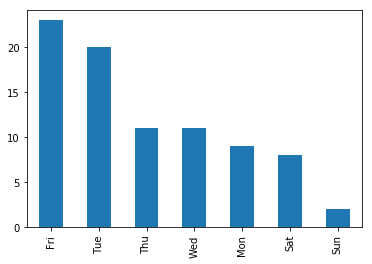

In [10]:
counts = df["eff_date_day_of_week"].value_counts()
counts.plot(kind="bar")

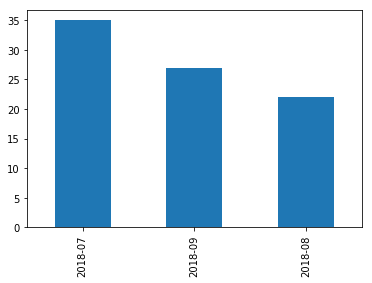

In [11]:
counts = df["eff_date_year_month"].value_counts()
counts.plot(kind="bar")

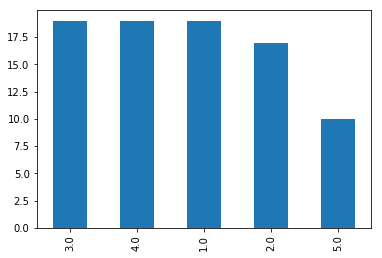

In [12]:
counts = df["eff_date_week_of_month"].value_counts()
counts.plot(kind="bar")

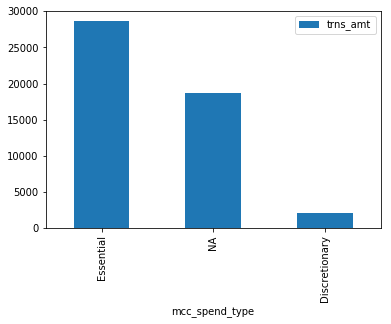

In [20]:
gdf = df[["mcc_spend_type", "trns_amt"]].groupby(["mcc_spend_type"]).sum()
gdf = gdf.sort_values(by=["trns_amt"], ascending=False)
gdf.plot(kind="bar")

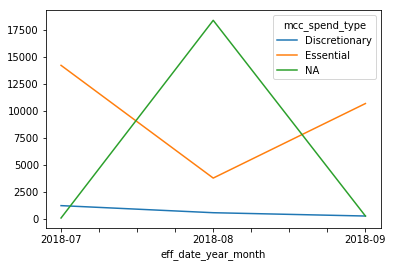

In [36]:
pd.pivot_table(df, values = "trns_amt", index = "eff_date_year_month", columns = "mcc_spend_type",aggfunc ="sum").plot.line()

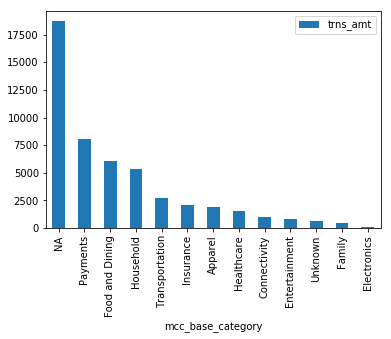

In [21]:
gdf = df[["mcc_base_category", "trns_amt"]].groupby(["mcc_base_category"]).sum()
gdf = gdf.sort_values(by=["trns_amt"], ascending=False)
gdf.plot(kind="bar")

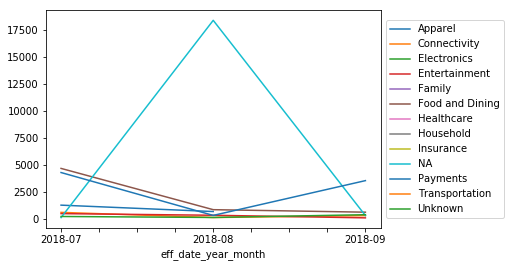

In [39]:
pd.pivot_table(df, values = "trns_amt", index = "eff_date_year_month", columns = "mcc_base_category",aggfunc ="sum").plot.line().legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

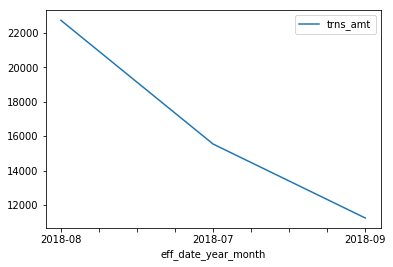

In [47]:
gdf = df[["eff_date_year_month", "trns_amt"]].groupby(["eff_date_year_month"]).sum()
gdf = gdf.sort_values(by=["trns_amt"], ascending=False)
gdf.plot(kind="line")

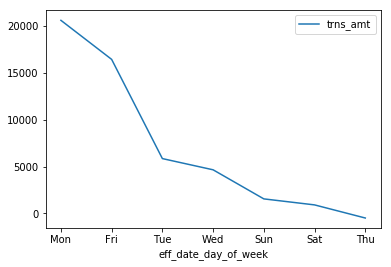

In [50]:
gdf = df[["eff_date_day_of_week", "trns_amt"]].groupby(["eff_date_day_of_week"]).sum()
gdf = gdf.sort_values(by=["trns_amt"], ascending=False)
gdf.plot(kind="line")

## Critical Questions

- Which customers are not engaged? (showing a reduction in spending.)
- Am I making the best recommendations for the customer? (Partnership)
- What will customers spend money on next? (Next Best Action)
- Which customers will be spending irresponsibility?
- What is the trend of spening over time?